In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
X = data[['Age', 'Gender', 'EstimatedSalary']]
y = data['Purchased']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predicting on test data and checking accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8875


In [11]:
!pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta 0:00:00
     -------------------------------------- 106.9/106.9 KB 6.0 MB/s eta 0:00:00
     -------------------------------------- 211.8/211.8 KB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB ? eta 0:00:00


You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [16]:
from matplotlib.colors import ListedColormap

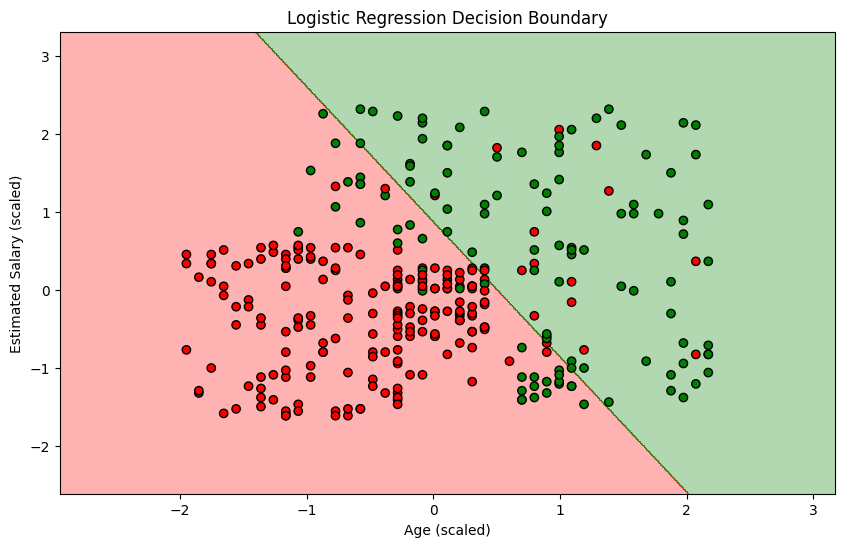

In [17]:
# Only taking Age and EstimatedSalary for visualization
X_train_2d = X_train[:, [0, 2]]
X_test_2d = X_test[:, [0, 2]]
model_2d = LogisticRegression(random_state=42)
model_2d.fit(X_train_2d, y_train)

# Define the decision boundary function
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plotting the decision boundary and dataset
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_2d, y_train, model_2d)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, marker='o', edgecolor='k', cmap=ListedColormap(('red', 'green')))
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.title('Logistic Regression Decision Boundary')
plt.show()


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [19]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
